Connected to .venv (Python 3.12.1)

In [1]:
import sys
from neurodsp.sim import sim_combined
from neurodsp.sim import sim_powerlaw, sim_oscillation
from neurodsp.utils import create_times
import numpy as np
import scipy.signal as dsp
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')
sns.set_context('poster')
sys.path.append('../')
from scipy.signal import ShortTimeFFT

from irasa import irasa_sprint
from irasa_utils import _gen_time_from_sft

In [2]:
fs = 500
n_seconds = 60
duration=2
overlap=0.5


sim_components = {'sim_powerlaw': {'exponent' : -1}, 
                  'sim_oscillation': {'freq' : 10}}

#x1 = sim_combined(n_seconds=10, fs=fs, components=sim_components)
x1 = sim_oscillation(n_seconds=10, fs=fs, freq=10)
x2 = sim_powerlaw(n_seconds=10, fs=fs, exponent=-1)
x3 = sim_oscillation(n_seconds=10, fs=fs, freq=20)
x4 = sim_oscillation(n_seconds=20, fs=fs, freq=30)


x = np.concatenate([x1 + x2, np.concatenate([x2, x2 + x1]) + x4, x2 + x3, x2])
x_2 = np.concatenate([np.concatenate([x2, x2 + x1]) + x4, x1 + x2, x2 + x3, x2])

x = np.tile(x, 10)
x_2 = np.tile(x_2, 10)

x_l = np.concatenate([x[np.newaxis, :], x_2[np.newaxis, :]], axis=0)

In [3]:
win = dsp.windows.tukey(int(fs*duration), 0.25)
SFT = ShortTimeFFT(win, hop=int(win.shape[0]), 
                fs=fs, scale_to='psd')

#get time and frequency info
my_time = _gen_time_from_sft(SFT, x_l)
freqs = SFT.f

sgramm = SFT.spectrogram(x_l, detr='constant')
tmin, tmax = SFT.extent(x_l.shape[-1])[:2]

In [4]:
freq_mask = freqs < 40
new_freqs = freqs[freq_mask]

import time

start = time.time()
sgramm_aperiodic, sgramm_periodic, freqs_ap, time_ap = irasa_sprint(x_l, fs=fs, duration=duration)
stop = time.time()
print(stop-start)

1.3299293518066406


In [5]:
freq_mask_ap = freqs_ap < 40
new_freqs_ap = freqs_ap[freq_mask_ap]

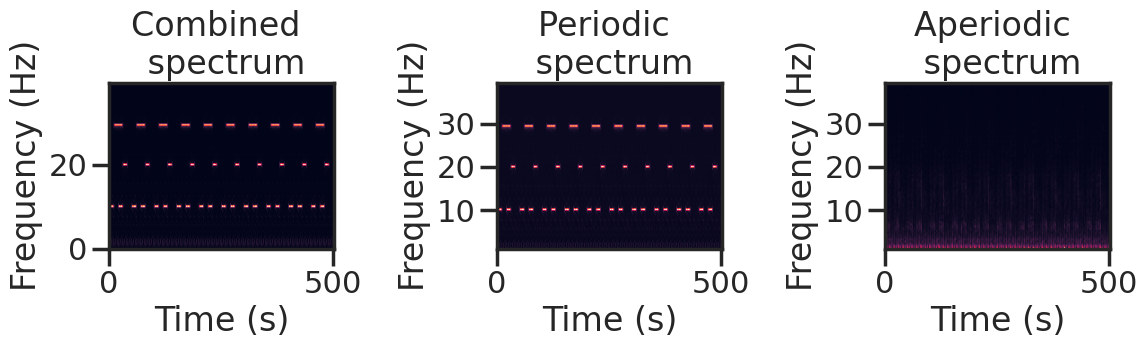

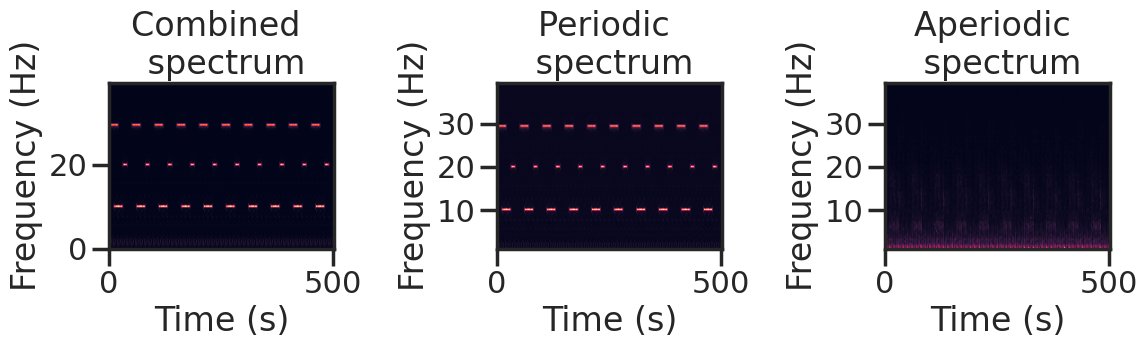

In [6]:
for ch in [0, 1]:
    f, axes = plt.subplots(ncols=3, figsize=(12, 4))

    for ax in axes:
        ax.set_ylabel('Frequency (Hz)')
        ax.set_xlabel('Time (s)')

    axes[0].set_title('Combined \n spectrum')
    axes[0].imshow(sgramm[ch, freq_mask, :], 
            extent=(tmin, tmax, new_freqs.min(), new_freqs.max()), 
            origin='lower',
            aspect='auto')

    axes[1].set_title('Periodic \n spectrum')
    axes[1].imshow(sgramm_periodic[ch, freq_mask_ap,:],
            extent=(tmin, tmax, new_freqs_ap.min(), new_freqs_ap.max()), 
            origin='lower',
            aspect='auto')

    axes[2].set_title('Aperiodic \n spectrum')
    axes[2].imshow(sgramm_aperiodic[ch,freq_mask_ap,:],
            extent=(tmin, tmax, new_freqs_ap.min(), new_freqs_ap.max()), 
            origin='lower',
            aspect='auto')

    plt.tight_layout()

In [7]:
from peak_utils import get_peak_params_sprint
import pandas as pd


df_peaks = get_peak_params_sprint(sgramm_periodic, freqs=freqs_ap, times=time_ap)

In [8]:
df_peaks

,ch_name,cf,bw,pw,time
0,0,10.0,1.870967,0.226878,0.0
0,1,29.0,1.714257,0.178886,0.0
0,0,9.5,1.282691,0.512559,2.0
0,1,29.0,1.292672,0.446897,2.0
0,0,9.5,1.276487,0.432188,4.0
...,...,...,...,...,...
1,0,12.0,1.319258,0.015169,498.0
0,1,7.5,1.515213,0.012050,498.0
1,1,12.0,1.319258,0.015169,498.0
2,0,7.0,3.016053,0.015564,500.0


In [9]:
from peak_utils import get_peak_params_sprint
import pandas as pd


df_peaks = get_peak_params_sprint(sgramm_periodic, freqs=freqs_ap, times=time_ap)

In [10]:
df_peaks

,ch_name,cf,bw,pw,time
0,0,10.0,1.870967,0.226878,0.0
0,1,29.0,1.714257,0.178886,0.0
0,0,9.5,1.282691,0.512559,2.0
0,1,29.0,1.292672,0.446897,2.0
0,0,9.5,1.276487,0.432188,4.0
...,...,...,...,...,...
1,0,12.0,1.319258,0.015169,498.0
0,1,7.5,1.515213,0.012050,498.0
1,1,12.0,1.319258,0.015169,498.0
2,0,7.0,3.016053,0.015564,500.0


In [11]:
import sys
from neurodsp.sim import sim_combined
from neurodsp.sim import sim_powerlaw, sim_oscillation
from neurodsp.utils import create_times
import numpy as np
import scipy.signal as dsp
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')
sns.set_context('poster')
sys.path.append('../')
from scipy.signal import ShortTimeFFT

from irasa import irasa_sprint
from irasa_utils import _gen_time_from_sft

In [12]:
fs = 500
n_seconds = 60
duration=2
overlap=0.5


sim_components = {'sim_powerlaw': {'exponent' : -1}, 
                  'sim_oscillation': {'freq' : 10}}

#x1 = sim_combined(n_seconds=10, fs=fs, components=sim_components)
x1 = sim_oscillation(n_seconds=10, fs=fs, freq=10)
x2 = sim_powerlaw(n_seconds=10, fs=fs, exponent=-1)
x3 = sim_oscillation(n_seconds=10, fs=fs, freq=20)
x4 = sim_oscillation(n_seconds=20, fs=fs, freq=30)


x = np.concatenate([x1 + x2, np.concatenate([x2, x2 + x1]) + x4, x2 + x3, x2])
x_2 = np.concatenate([np.concatenate([x2, x2 + x1]) + x4, x1 + x2, x2 + x3, x2])

x = np.tile(x, 10)
x_2 = np.tile(x_2, 10)

x_l = np.concatenate([x[np.newaxis, :], x_2[np.newaxis, :]], axis=0)

In [13]:
win = dsp.windows.tukey(int(fs*duration), 0.25)
SFT = ShortTimeFFT(win, hop=int(win.shape[0]), 
                fs=fs, scale_to='psd')

#get time and frequency info
my_time = _gen_time_from_sft(SFT, x_l)
freqs = SFT.f

sgramm = SFT.spectrogram(x_l, detr='constant')
tmin, tmax = SFT.extent(x_l.shape[-1])[:2]

In [14]:
freq_mask = freqs < 40
new_freqs = freqs[freq_mask]

import time

start = time.time()
sgramm_aperiodic, sgramm_periodic, freqs_ap, time_ap = irasa_sprint(x_l, fs=fs, duration=duration)
stop = time.time()
print(stop-start)

1.1687169075012207


In [15]:
freq_mask_ap = freqs_ap < 40
new_freqs_ap = freqs_ap[freq_mask_ap]

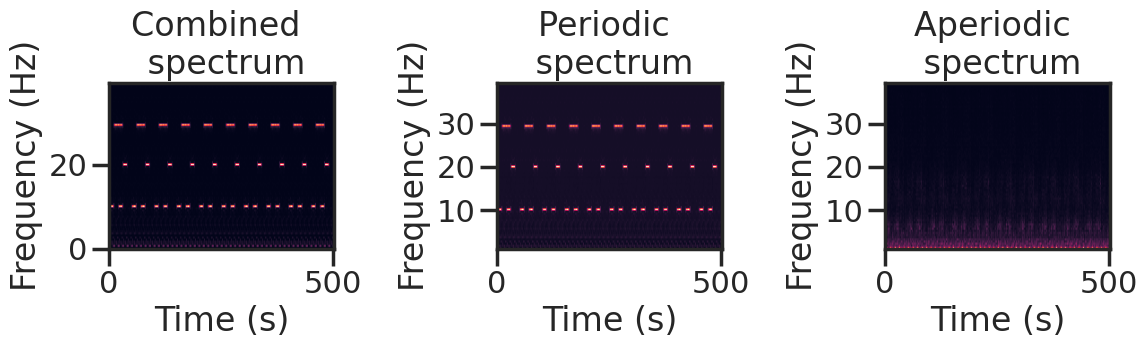

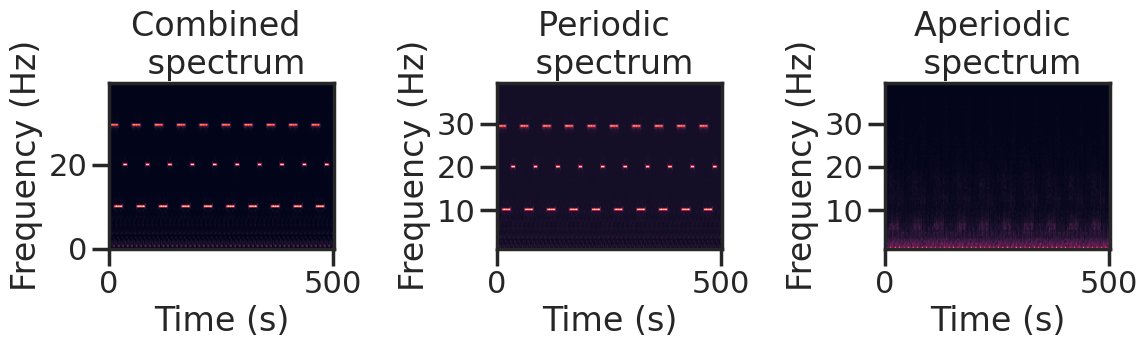

In [16]:
for ch in [0, 1]:
    f, axes = plt.subplots(ncols=3, figsize=(12, 4))

    for ax in axes:
        ax.set_ylabel('Frequency (Hz)')
        ax.set_xlabel('Time (s)')

    axes[0].set_title('Combined \n spectrum')
    axes[0].imshow(sgramm[ch, freq_mask, :], 
            extent=(tmin, tmax, new_freqs.min(), new_freqs.max()), 
            origin='lower',
            aspect='auto')

    axes[1].set_title('Periodic \n spectrum')
    axes[1].imshow(sgramm_periodic[ch, freq_mask_ap,:],
            extent=(tmin, tmax, new_freqs_ap.min(), new_freqs_ap.max()), 
            origin='lower',
            aspect='auto')

    axes[2].set_title('Aperiodic \n spectrum')
    axes[2].imshow(sgramm_aperiodic[ch,freq_mask_ap,:],
            extent=(tmin, tmax, new_freqs_ap.min(), new_freqs_ap.max()), 
            origin='lower',
            aspect='auto')

    plt.tight_layout()

In [17]:
 mfft=2**np.ceil(np.log2(1.95*4000))

In [18]:
mfft

8192.0